In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classification using Random Forests

## Loading the diabetes dataset

In [46]:
filePath = "F:/NortheasternUniversity/Semester4/DataMining/Project/dataset_diabetes/diabetic_data.csv"
# May not need this.
diabetes_cols = ['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted']

diabetes_df = pd.read_csv(filePath, sep=",")
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Droping unuseful colums

In [47]:
diabetes_df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 
#                  'race', 
#                  'max_glu_serum', 'A1Cresult', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone',
#                  'acetohexamide', 'repaglinide' , 'nateglinide', 'chlorpropamide', 'metformin', 'glipizide',
#                  'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
#                  'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
#                  'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed'
                 ], 1, inplace=True)
diabetes_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Droping numerical features

## Converting the diag_1, diag_2, diag_3 values using their ICD9 values to String

In [48]:
# Changed the 'diag_1' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].str.contains('250'), 'Diabetes', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_1'])
diabetes_df['diag_1'] = np.where(diabetes_df['diag_1'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_1'], 'Other')


In [49]:
# Changed the 'diag_2' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].str.contains('250'), 'Diabetes', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_2'])
diabetes_df['diag_2'] = np.where(diabetes_df['diag_2'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_2'], 'Other')


In [50]:
# Changed the 'diag_3' based on ICD9 values to one of 'Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms'
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].str.contains('250'), 'Diabetes', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419','420','421','422','423','424','425','426','427','428','429','430','431','432','433','434','435','436','437','438','439','440','441','442','443','444','445','446','447','448','449','450','451','452','453','454','455','456','457','458','459','785']), 'Circulatory', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['460','461','462','463','464','465','466','467','468','469','470','471','472','473','474','475','476','477','478','479','480','481','482','483','484','485','486','487','488','489','490','49','492','493','494','495','496','497','498','499','500','501','502','503','504','505','506','507','508','509','510','511','512','513','514','515','516','517','518','519','786']), 'Respiratory', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['520','521','522','523','524','525','526','527','528','529','530','531','532','533','534','535','536','537','538','539','540','541','542','543','544','545','546','547','548','549','550','55','552','553','554','555','556','557','558','559','560','561','562','563','564','565','566','567','568','569','570','571','572','573','574','575','576','577','578','579','787']), 'Digestive', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['800','801','802','803','804','805','806','807','808','809','810','811','812','813','814','815','816','817','818','819','820','821','822','823','824','825','826','827','828','829','830','81','832','833','834','835','836','837','838','839','840','841','842','843','844','845','846','847','848','849','850','851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867','868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884','885','886','887','888','889','890','891','892','893','894','895','896','897','898','899','900','901','902','903','904','905','906','907','908','909','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','26','927','928','929','930','931','932','933','934','935','936','937','938','939','940','941','942','943','944','945','946','947','948','949','950','951','952','953','954','955','956','957','958','959','960','961','962','963','964','965','966','967','968','969','970','971','972','973','974','975','976','977','978','979','980','981','982','983','984','985','986','987','988','989','990','991','992','993','994','995','996','997','998','999']), 'Injury', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['710','711','712','713','714','715','716','717','718','719','720','721','722','723','724','725','726','727','728','729','730','731','732','733','734','735','736','737','738','739']), 'Musculoskeletal', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['580','581','582','583','584','585','586','587','588','589','590','591','592','593','594','595','596','597','598','599','600','601','602','603','604','605','606','607','608','609','610','61','612','613','614','615','616','617','618','619','620','621','622','623','624','625','626','627','628','629','788']), 'Genitourinary', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','17','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238']), 'Neoplasms', diabetes_df['diag_3'])
diabetes_df['diag_3'] = np.where(diabetes_df['diag_3'].isin(['Diabetes','Circulatory','Respiratory','Digestive','Injury','Musculoskeletal','Genitourinary','Neoplasms']), diabetes_df['diag_3'], 'Other')
diabetes_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Replacing String Categorical features to numbers

In [51]:
# race
race = diabetes_df.iloc[:,diabetes_df.columns.get_loc("race")].str.replace('?', 'Caucasian')
distinct_race = race.unique()
diabetes_df.race = np.array([np.where(distinct_race == i)[0][0] for i in race])

# max_glu_serum
max_glu_serum = diabetes_df.iloc[:,diabetes_df.columns.get_loc("max_glu_serum")].str.replace('?', 'None')
distinct_max_glu_serum = max_glu_serum.unique()
diabetes_df.max_glu_serum = np.array([np.where(distinct_max_glu_serum == i)[0][0] for i in max_glu_serum])

# A1Cresult
A1Cresult = diabetes_df.iloc[:,diabetes_df.columns.get_loc("A1Cresult")].str.replace('?', 'None')
distinct_A1Cresult = A1Cresult.unique()
diabetes_df.A1Cresult = np.array([np.where(distinct_A1Cresult == i)[0][0] for i in A1Cresult])

# metformin
metformin = diabetes_df.iloc[:,diabetes_df.columns.get_loc("metformin")].str.replace('?', 'No')
distinct_metformin = metformin.unique()
diabetes_df.metformin = np.array([np.where(distinct_metformin == i)[0][0] for i in metformin])

# repaglinide 
repaglinide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("repaglinide")].str.replace('?', 'No') 
distinct_repaglinide = repaglinide.unique()
diabetes_df.repaglinide = np.array([np.where(distinct_repaglinide == i)[0][0] for i in repaglinide])

# nateglinide
nateglinide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("nateglinide")].str.replace('?', 'No')
distinct_nateglinide = nateglinide.unique()
diabetes_df.nateglinide = np.array([np.where(distinct_nateglinide == i)[0][0] for i in nateglinide])

# chlorpropamide
chlorpropamide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("chlorpropamide")].str.replace('?', 'No')
distinct_chlorpropamide = chlorpropamide.unique()
diabetes_df.chlorpropamide = np.array([np.where(distinct_chlorpropamide == i)[0][0] for i in chlorpropamide])

# glimepiride
glimepiride = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glimepiride")].str.replace('?', 'No')
distinct_glimepiride = glimepiride.unique()
diabetes_df.glimepiride = np.array([np.where(distinct_glimepiride == i)[0][0] for i in glimepiride])

# acetohexamide most of the values are No
acetohexamide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("acetohexamide")].str.replace('?', 'No')
distinct_acetohexamide = acetohexamide.unique()
diabetes_df.acetohexamide = np.array([np.where(distinct_acetohexamide == i)[0][0] for i in acetohexamide])

# glipizide
glipizide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glipizide")].str.replace('?', 'No')
distinct_glipizide = glipizide.unique()
diabetes_df.glipizide = np.array([np.where(distinct_glipizide == i)[0][0] for i in glipizide])

# glyburide
glyburide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glyburide")].str.replace('?', 'No')
distinct_glyburide = glyburide.unique()
diabetes_df.glyburide = np.array([np.where(distinct_glyburide == i)[0][0] for i in glyburide])

# tolbutamide
tolbutamide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("tolbutamide")].str.replace('?', 'No')
distinct_tolbutamide = tolbutamide.unique()
diabetes_df.tolbutamide = np.array([np.where(distinct_tolbutamide == i)[0][0] for i in tolbutamide])

# pioglitazone
pioglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("pioglitazone")].str.replace('?', 'No')
distinct_pioglitazone = pioglitazone.unique()
diabetes_df.pioglitazone = np.array([np.where(distinct_pioglitazone == i)[0][0] for i in pioglitazone])

# rosiglitazone
rosiglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("rosiglitazone")].str.replace('?', 'No')
distinct_rosiglitazone = rosiglitazone.unique()
diabetes_df.rosiglitazone = np.array([np.where(distinct_rosiglitazone == i)[0][0] for i in rosiglitazone])

# acarbose
acarbose = diabetes_df.iloc[:,diabetes_df.columns.get_loc("acarbose")].str.replace('?', 'No')
distinct_acarbose = acarbose.unique()
diabetes_df.acarbose = np.array([np.where(distinct_acarbose == i)[0][0] for i in acarbose])

# miglitol
miglitol = diabetes_df.iloc[:,diabetes_df.columns.get_loc("miglitol")].str.replace('?', 'No')
distinct_miglitol = miglitol.unique()
diabetes_df.miglitol = np.array([np.where(distinct_miglitol == i)[0][0] for i in miglitol])

# troglitazone
troglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("troglitazone")].str.replace('?', 'No')
distinct_troglitazone = troglitazone.unique()
diabetes_df.troglitazone = np.array([np.where(distinct_troglitazone == i)[0][0] for i in troglitazone])

# tolazamide
tolazamide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("tolazamide")].str.replace('?', 'No')
distinct_tolazamide = tolazamide.unique()
diabetes_df.tolazamide = np.array([np.where(distinct_tolazamide == i)[0][0] for i in tolazamide])

# examide
examide = diabetes_df.iloc[:,diabetes_df.columns.get_loc("examide")].str.replace('?', 'No')
distinct_examide = examide.unique()
diabetes_df.examide = np.array([np.where(distinct_examide == i)[0][0] for i in examide])

# citoglipton
citoglipton = diabetes_df.iloc[:,diabetes_df.columns.get_loc("citoglipton")].str.replace('?', 'No')
distinct_citoglipton = citoglipton.unique()
diabetes_df.citoglipton = np.array([np.where(distinct_citoglipton == i)[0][0] for i in citoglipton])

# glyburide-metformin
glyburide_metformin = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glyburide-metformin")].str.replace('?', 'No')
distinct_glyburide_metformin = glyburide_metformin.unique()
diabetes_df['glyburide-metformin'] = np.array([np.where(distinct_glyburide_metformin == i)[0][0] for i in glyburide_metformin])

# glipizide-metformin
glipizide_metformin = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glipizide-metformin")].str.replace('?', 'No')
distinct_glipizide_metformin = glipizide_metformin.unique()
diabetes_df['glipizide-metformin'] = np.array([np.where(distinct_glipizide_metformin == i)[0][0] for i in glipizide_metformin])

# glimepiride-pioglitazone
glimepiride_pioglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("glimepiride-pioglitazone")].str.replace('?', 'No')
distinct_glimepiride_pioglitazone = glimepiride_pioglitazone.unique()
diabetes_df['glimepiride-pioglitazone'] = np.array([np.where(distinct_glimepiride_pioglitazone == i)[0][0] for i in glimepiride_pioglitazone])

# metformin-rosiglitazone
metformin_rosiglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("metformin-rosiglitazone")].str.replace('?', 'No')
distinct_metformin_rosiglitazone = metformin_rosiglitazone.unique()
diabetes_df['metformin-rosiglitazone'] = np.array([np.where(distinct_metformin_rosiglitazone == i)[0][0] for i in metformin_rosiglitazone])

# metformin-pioglitazone
metformin_pioglitazone = diabetes_df.iloc[:,diabetes_df.columns.get_loc("metformin-pioglitazone")].str.replace('?', 'No')
distinct_metformin_pioglitazone = metformin_pioglitazone.unique()
diabetes_df['metformin-pioglitazone'] = np.array([np.where(distinct_metformin_pioglitazone == i)[0][0] for i in metformin_pioglitazone])

# diabetesMed
diabetesMed = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diabetesMed")].str.replace('?', 'Yes') 
distinct_diabetesMed = diabetesMed.unique()
diabetes_df.diabetesMed = np.array([np.where(distinct_diabetesMed == i)[0][0] for i in diabetesMed])
##################################################################################################
# gender
gender = diabetes_df.iloc[:,diabetes_df.columns.get_loc("gender")].str.replace('?', 'Female')
distinct_gender = gender.unique()
diabetes_df.gender = np.array([np.where(distinct_gender == i)[0][0] for i in gender])

# age
age = diabetes_df.iloc[:,diabetes_df.columns.get_loc("age")].str.replace('?', '[70-80)')
distinct_age = age.unique()
diabetes_df.age = np.array([np.where(distinct_age == i)[0][0] for i in age])

# diag_1
diag_1 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_1")].str.replace('?', 'Other')
distinct_diag_1 = diag_1.unique()
diabetes_df.diag_1 = np.array([np.where(distinct_diag_1 == i)[0][0] for i in diag_1])

# diag_2
diag_2 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_2")].str.replace('?', 'Other')
distinct_diag_2 = diag_2.unique()
diabetes_df.diag_2 = np.array([np.where(distinct_diag_2 == i)[0][0] for i in diag_2])

# diag_3
diag_3 = diabetes_df.iloc[:,diabetes_df.columns.get_loc("diag_3")].str.replace('?', 'Other')
distinct_diag_3 = diag_3.unique()
diabetes_df.diag_3 = np.array([np.where(distinct_diag_3 == i)[0][0] for i in diag_3])

# insulin
insulin = diabetes_df.iloc[:,diabetes_df.columns.get_loc("insulin")].str.replace('?', 'No')
distinct_insulin = insulin.unique()
diabetes_df.insulin = np.array([np.where(distinct_insulin == i)[0][0] for i in insulin])

# change
change = diabetes_df.iloc[:,diabetes_df.columns.get_loc("change")].str.replace('?', 'No')
distinct_change = change.unique()
diabetes_df.change = np.array([np.where(distinct_change == i)[0][0] for i in change])

# readmitted
readmitted = diabetes_df.iloc[:,diabetes_df.columns.get_loc("readmitted")].str.replace('?', 'NO')
readmitted = readmitted.str.replace('>30', 'NO')
distinct_readmitted = readmitted.unique()
diabetes_df.readmitted =readmitted
diabetes_df.head()


## Split on input data and class label

In [52]:
# Let's split on input data/class label
# In an unsupervised setting, we might not have the class label,
# or use it only for final evaluation
X = diabetes_df.iloc[:,0:-1]
Y = diabetes_df.iloc[:, -1]
#diabetes_df = None

## Split the data into test and train

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123456)

## Fit a Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

## Use model to Classify test data

In [55]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.888
Mean accuracy score: 0.889


## Visualizing Performance with Confusion Matrix

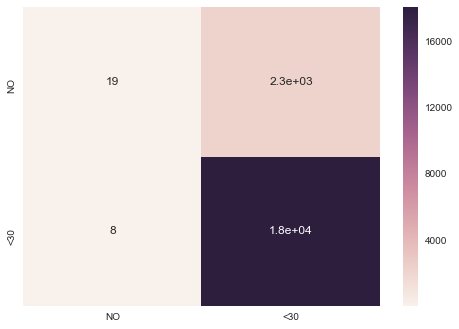

In [56]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=distinct_readmitted, index=distinct_readmitted)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
sns.pairplot(diabetes_df, hue='readmitted')
plt.show()
#plt.savefig("2_seaborn_pair_plot.png")